In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import json
from torchvision import transforms as T
from torchvision.datasets import CocoDetection
from hcmus.integrate.rpn import YoloRegionProposal
from hcmus.integrate.classifier import Classifier
from hcmus.integrate.pipeline import ModelPipeline

transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
])

In [ ]:
rpn = YoloRegionProposal(run_id="c51c510c82c84e9185dd922dbcdb2a57")
classifier = Classifier(run_id='415b1f0c9b8640d9848e0fc470528ecc')
pipeline = ModelPipeline(rpn,classifier, transforms)

In [ ]:
split_name = "val"
dataset_dir = f"/Volumes/Cucumber/Projects/datasets/curated/hcmus-iid-2/{split_name}"
ann_path = f"{dataset_dir}/annotations_{split_name}.json"
dataset = CocoDetection(
    root=f"{dataset_dir}/images",
    annFile=ann_path
)
cat2label = json.load(open(ann_path))["categories"]
cat2label = {x["id"]: x["name"] for x in cat2label}
label2cat = {v: k for k, v in cat2label.items()}

In [ ]:
def convert_to_coco_format(predictions, category_mapping=None):
    """
    Convert predictions to COCO format.

    Args:
        predictions: List of prediction dictionaries
        category_mapping: Dictionary mapping pred_label to category_id
                         If None, uses pred_idx or assigns default IDs

    Returns:
        List of COCO format dictionaries
    """
    coco_results = []

    for pred in predictions:
        # Convert box format from [x1, y1, x2, y2] to [x, y, width, height]
        x1, y1, x2, y2 = pred['box']
        bbox = [x1, y1, x2 - x1, y2 - y1]
        image_id = pred['image_id']
        score = pred['score']

        # Determine category_id
        if category_mapping and pred['pred_label'] in category_mapping:
            category_id = category_mapping[pred['pred_label']]
        elif pred['pred_idx'] != -1:
            category_id = pred['pred_idx']
        else:
            category_id = 101

        coco_results.append({
            'image_id': image_id,
            'category_id': category_id,
            'bbox': bbox,
            'score': score
        })


    return coco_results

In [60]:
from PIL import ImageOps

predictions = []
anns = []
for i, (image, ann) in enumerate(dataset):
    image = ImageOps.exif_transpose(image)
    result = pipeline.forward(image)
    image_id = ann[0].get("image_id")
    for item in result:
        item["image_id"] = image_id
    predictions.extend(result)
    anns.extend(ann)
predictions = convert_to_coco_format(predictions, label2cat)


0: 480x640 10 objects, 64.1ms
Speed: 3.1ms preprocess, 64.1ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:49.353 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:41:49.354 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 16 objects, 153.6ms
Speed: 1.0ms preprocess, 153.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:50.631 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:41:50.633 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 22 objects, 108.6ms
Speed: 1.1ms preprocess, 108.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:41:51.662 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:41:51.662 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 640x480 14 objects, 56.0ms
Speed: 1.6ms preprocess, 56.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:41:53.947 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:41:53.948 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 480x640 16 objects, 51.8ms
Speed: 3.6ms preprocess, 51.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:55.583 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:41:55.584 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 480x640 2 objects, 57.7ms
Speed: 2.2ms preprocess, 57.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:57.334 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:41:57.335 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 3 objects, 44.9ms
Speed: 1.5ms preprocess, 44.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:57.599 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:41:57.600 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 13 objects, 52.5ms
Speed: 2.2ms preprocess, 52.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:57.862 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:41:57.862 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 480x640 13 objects, 76.4ms
Speed: 2.8ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:41:59.232 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:41:59.232 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 2 objects, 70.3ms
Speed: 1.7ms preprocess, 70.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:00.056 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:00.057 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 3 objects, 44.6ms
Speed: 2.2ms preprocess, 44.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:00.412 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:00.412 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 48.4ms
Speed: 2.2ms preprocess, 48.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:00.814 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:00.814 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 15 objects, 49.9ms
Speed: 2.1ms preprocess, 49.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:01.460 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:42:01.461 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 480x640 15 objects, 40.7ms
Speed: 2.2ms preprocess, 40.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:02.472 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:42:02.472 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 10 objects, 62.1ms
Speed: 1.7ms preprocess, 62.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:03.565 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:03.565 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 9 objects, 47.5ms
Speed: 1.9ms preprocess, 47.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:04.003 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:04.004 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 10 objects, 46.4ms
Speed: 2.5ms preprocess, 46.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:05.005 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:05.006 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 6 objects, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:05.577 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:05.578 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 11 objects, 39.3ms
Speed: 1.5ms preprocess, 39.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:06.242 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:42:06.243 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 10 objects, 43.8ms
Speed: 1.8ms preprocess, 43.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:07.377 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:42:07.378 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 5 objects, 134.4ms
Speed: 3.1ms preprocess, 134.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:08.763 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:08.764 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 6 objects, 65.2ms
Speed: 2.0ms preprocess, 65.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:09.428 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:09.429 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 11 objects, 50.4ms
Speed: 2.4ms preprocess, 50.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:10.209 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:10.210 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 11 objects, 39.4ms
Speed: 2.0ms preprocess, 39.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:11.134 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:42:11.135 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 480x640 5 objects, 54.0ms
Speed: 31.9ms preprocess, 54.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:12.582 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:12.583 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 12 objects, 61.7ms
Speed: 3.1ms preprocess, 61.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:13.007 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:42:13.008 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 4 objects, 55.5ms
Speed: 3.8ms preprocess, 55.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:14.549 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:14.550 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 33 objects, 50.5ms
Speed: 1.7ms preprocess, 50.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:15.084 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 33
2025-07-16 13:42:15.086 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 33



0: 480x640 5 objects, 47.8ms
Speed: 2.0ms preprocess, 47.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:18.827 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:18.828 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 4 objects, 51.1ms
Speed: 2.0ms preprocess, 51.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:19.536 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:19.536 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 11 objects, 100.7ms
Speed: 3.1ms preprocess, 100.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:20.114 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:20.116 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 11 objects, 38.4ms
Speed: 1.8ms preprocess, 38.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:20.983 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:20.984 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 4 objects, 52.7ms
Speed: 1.9ms preprocess, 52.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:21.793 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:21.794 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 3 objects, 46.9ms
Speed: 1.5ms preprocess, 46.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:22.224 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:22.224 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 63.8ms
Speed: 1.7ms preprocess, 63.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:22.621 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:22.621 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 4 objects, 42.0ms
Speed: 1.5ms preprocess, 42.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:23.292 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:23.293 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 8 objects, 59.2ms
Speed: 2.7ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:23.913 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:23.914 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 6 objects, 66.4ms
Speed: 2.4ms preprocess, 66.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:24.826 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:24.827 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 6 objects, 63.0ms
Speed: 2.4ms preprocess, 63.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:25.096 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:25.097 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 7 objects, 49.1ms
Speed: 3.6ms preprocess, 49.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:25.641 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:25.641 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 6 objects, 42.0ms
Speed: 2.1ms preprocess, 42.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:26.473 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:26.473 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 6 objects, 60.3ms
Speed: 2.3ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:27.261 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:27.261 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 6 objects, 92.4ms
Speed: 2.3ms preprocess, 92.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:28.061 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:28.061 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 7 objects, 43.9ms
Speed: 3.1ms preprocess, 43.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:28.653 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:28.654 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:28.973 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:28.973 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 13 objects, 67.2ms
Speed: 3.0ms preprocess, 67.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:29.723 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:29.724 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 3 objects, 62.1ms
Speed: 1.8ms preprocess, 62.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:30.364 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:30.364 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 640x480 7 objects, 53.1ms
Speed: 2.5ms preprocess, 53.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:30.758 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:30.759 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 11 objects, 52.4ms
Speed: 2.8ms preprocess, 52.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:30.999 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:42:31.000 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 6 objects, 117.9ms
Speed: 4.5ms preprocess, 117.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:32.300 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:32.300 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 4 objects, 38.8ms
Speed: 3.7ms preprocess, 38.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:33.195 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:33.195 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 6 objects, 47.8ms
Speed: 2.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:33.678 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:33.679 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 44.9ms
Speed: 1.9ms preprocess, 44.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:34.003 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:34.004 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 5 objects, 43.4ms
Speed: 1.8ms preprocess, 43.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:34.732 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:34.732 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 6 objects, 66.1ms
Speed: 2.1ms preprocess, 66.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:35.283 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:35.284 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 6 objects, 70.1ms
Speed: 1.7ms preprocess, 70.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:35.540 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:35.541 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 8 objects, 51.6ms
Speed: 1.5ms preprocess, 51.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:36.022 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:36.023 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 5 objects, 62.4ms
Speed: 1.7ms preprocess, 62.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:36.938 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:36.939 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 2 objects, 78.7ms
Speed: 2.2ms preprocess, 78.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:37.629 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:37.629 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 5 objects, 61.1ms
Speed: 1.7ms preprocess, 61.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:37.898 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:37.899 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 6 objects, 51.6ms
Speed: 1.5ms preprocess, 51.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:38.554 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:38.554 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 2 objects, 46.4ms
Speed: 2.2ms preprocess, 46.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:39.255 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:39.256 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 2 objects, 40.5ms
Speed: 1.7ms preprocess, 40.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:39.491 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:39.491 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 3 objects, 54.2ms
Speed: 2.2ms preprocess, 54.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:39.726 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:39.727 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 4 objects, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:39.995 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:39.996 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 3 objects, 39.6ms
Speed: 2.0ms preprocess, 39.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:40.561 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:40.562 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 9 objects, 63.8ms
Speed: 2.4ms preprocess, 63.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:41.063 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:41.064 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 3 objects, 51.0ms
Speed: 1.8ms preprocess, 51.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:41.441 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:41.441 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 5 objects, 40.7ms
Speed: 2.1ms preprocess, 40.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:41.680 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:41.680 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 4 objects, 53.6ms
Speed: 1.9ms preprocess, 53.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:42.262 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:42.263 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 6 objects, 46.9ms
Speed: 2.4ms preprocess, 46.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:42.739 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:42.739 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 4 objects, 52.0ms
Speed: 1.5ms preprocess, 52.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:42.959 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:42.960 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 51.7ms
Speed: 1.8ms preprocess, 51.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:43.350 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:43.351 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 10 objects, 45.5ms
Speed: 1.5ms preprocess, 45.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:43.819 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:42:43.819 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 9 objects, 58.1ms
Speed: 3.4ms preprocess, 58.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:44.147 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:42:44.148 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 640x480 1 object, 43.4ms
Speed: 2.0ms preprocess, 43.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:45.031 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:42:45.032 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 640x480 6 objects, 58.6ms
Speed: 2.0ms preprocess, 58.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:45.171 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:45.172 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 11 objects, 44.4ms
Speed: 2.9ms preprocess, 44.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:45.866 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:42:45.866 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 5 objects, 42.8ms
Speed: 2.3ms preprocess, 42.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:46.844 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:42:46.844 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 640x480 3 objects, 47.9ms
Speed: 2.4ms preprocess, 47.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:46.982 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:46.982 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 3 objects, 48.0ms
Speed: 1.6ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:47.203 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:47.203 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 2 objects, 46.6ms
Speed: 1.9ms preprocess, 46.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:47.463 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:47.464 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 8 objects, 61.4ms
Speed: 1.6ms preprocess, 61.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:47.740 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:47.741 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 6 objects, 95.3ms
Speed: 1.7ms preprocess, 95.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:48.539 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:42:48.540 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 4 objects, 46.2ms
Speed: 3.0ms preprocess, 46.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:49.310 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:49.311 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 6 objects, 65.0ms
Speed: 2.6ms preprocess, 65.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:49.830 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:49.830 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 8 objects, 45.2ms
Speed: 1.6ms preprocess, 45.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:50.296 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:50.297 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 6 objects, 64.0ms
Speed: 1.7ms preprocess, 64.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:50.942 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:50.943 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 9 objects, 41.8ms
Speed: 1.7ms preprocess, 41.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:51.611 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:42:51.611 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 640x480 4 objects, 111.3ms
Speed: 2.7ms preprocess, 111.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:52.869 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:52.870 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 10 objects, 61.3ms
Speed: 1.6ms preprocess, 61.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:53.405 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:53.405 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 4 objects, 44.3ms
Speed: 1.8ms preprocess, 44.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:54.095 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:54.095 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 6 objects, 51.9ms
Speed: 2.2ms preprocess, 51.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:54.707 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:54.708 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 7 objects, 54.7ms
Speed: 1.5ms preprocess, 54.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:55.332 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:55.333 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 6 objects, 52.7ms
Speed: 3.2ms preprocess, 52.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:55.930 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:55.931 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 4 objects, 48.2ms
Speed: 1.9ms preprocess, 48.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:56.353 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:56.354 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 1 object, 57.0ms
Speed: 2.4ms preprocess, 57.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:56.821 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:56.822 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 2 objects, 40.2ms
Speed: 2.1ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:57.078 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:57.079 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 6 objects, 45.4ms
Speed: 2.4ms preprocess, 45.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:57.324 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:42:57.325 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 8 objects, 52.3ms
Speed: 1.9ms preprocess, 52.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:57.980 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:57.980 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 4 objects, 48.4ms
Speed: 1.5ms preprocess, 48.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:58.431 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:42:58.432 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 7 objects, 57.4ms
Speed: 2.9ms preprocess, 57.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:42:58.979 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:42:58.979 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 1 object, 48.1ms
Speed: 2.1ms preprocess, 48.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:59.446 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:59.446 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 5 objects, 57.4ms
Speed: 1.7ms preprocess, 57.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:59.690 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:42:59.690 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 11 objects, 32.1ms
Speed: 1.4ms preprocess, 32.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:42:59.952 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:42:59.952 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 7 objects, 48.0ms
Speed: 2.1ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:00.894 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:00.895 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 14 objects, 57.1ms
Speed: 2.6ms preprocess, 57.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:01.650 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:43:01.650 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 640x480 12 objects, 43.7ms
Speed: 2.6ms preprocess, 43.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:02.730 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:43:02.731 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 6 objects, 48.6ms
Speed: 1.7ms preprocess, 48.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:03.819 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:03.820 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 8 objects, 57.9ms
Speed: 3.3ms preprocess, 57.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:04.367 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:43:04.367 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 7 objects, 46.6ms
Speed: 1.6ms preprocess, 46.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:05.350 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:05.350 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 3 objects, 52.0ms
Speed: 2.1ms preprocess, 52.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:05.945 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:43:05.946 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 640x480 4 objects, 44.6ms
Speed: 2.1ms preprocess, 44.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:06.077 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:06.078 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 11 objects, 54.5ms
Speed: 2.4ms preprocess, 54.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:06.605 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:43:06.605 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 640x480 13 objects, 63.4ms
Speed: 2.4ms preprocess, 63.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:07.940 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:43:07.941 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 640x480 10 objects, 81.0ms
Speed: 2.4ms preprocess, 81.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:09.260 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:09.261 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 7 objects, 43.6ms
Speed: 1.6ms preprocess, 43.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:09.846 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:09.846 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 5 objects, 57.4ms
Speed: 2.1ms preprocess, 57.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:10.420 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:10.421 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 4 objects, 39.2ms
Speed: 1.5ms preprocess, 39.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:11.076 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:11.076 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 15 objects, 63.5ms
Speed: 1.7ms preprocess, 63.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:11.569 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:11.570 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 11 objects, 50.2ms
Speed: 1.7ms preprocess, 50.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:12.034 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 11
2025-07-16 13:43:12.035 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 11



0: 480x640 21 objects, 41.8ms
Speed: 1.5ms preprocess, 41.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:13.469 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:43:13.470 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 640x480 46 objects, 44.2ms
Speed: 2.3ms preprocess, 44.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:15.929 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 22
2025-07-16 13:43:15.929 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 22



0: 640x480 10 objects, 52.4ms
Speed: 1.8ms preprocess, 52.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:18.581 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:43:18.581 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 4 objects, 44.9ms
Speed: 2.0ms preprocess, 44.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:19.571 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:19.572 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 6 objects, 49.9ms
Speed: 2.2ms preprocess, 49.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:20.070 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:43:20.071 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 4 objects, 58.4ms
Speed: 2.0ms preprocess, 58.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:20.839 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:43:20.840 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 7 objects, 60.4ms
Speed: 2.6ms preprocess, 60.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:21.236 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:21.237 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 95 objects, 37.8ms
Speed: 2.7ms preprocess, 37.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:21.675 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 86
2025-07-16 13:43:21.677 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 86



0: 480x640 9 objects, 47.5ms
Speed: 2.7ms preprocess, 47.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:30.953 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:43:30.954 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 1 object, 25.1ms
Speed: 1.5ms preprocess, 25.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:31.209 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:43:31.209 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 31 objects, 60.6ms
Speed: 3.1ms preprocess, 60.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:31.491 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 28
2025-07-16 13:43:31.492 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 28



0: 480x640 11 objects, 55.6ms
Speed: 2.0ms preprocess, 55.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:34.624 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:43:34.625 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 3 objects, 44.5ms
Speed: 1.9ms preprocess, 44.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:35.414 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:43:35.415 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 5 objects, 55.7ms
Speed: 3.0ms preprocess, 55.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:35.741 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:35.742 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 9 objects, 64.3ms
Speed: 1.6ms preprocess, 64.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:36.270 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:36.270 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 2 objects, 49.0ms
Speed: 2.5ms preprocess, 49.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:36.778 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:43:36.779 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 5 objects, 65.4ms
Speed: 2.7ms preprocess, 65.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:37.084 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:43:37.084 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 480x640 6 objects, 51.0ms
Speed: 1.7ms preprocess, 51.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:37.215 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:37.216 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 2 objects, 42.7ms
Speed: 1.5ms preprocess, 42.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:37.784 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:43:37.785 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 6 objects, 78.9ms
Speed: 1.6ms preprocess, 78.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:38.063 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:43:38.063 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 5 objects, 38.3ms
Speed: 1.7ms preprocess, 38.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:38.829 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:38.830 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 24 objects, 53.7ms
Speed: 2.6ms preprocess, 53.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:39.577 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 17
2025-07-16 13:43:39.578 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 17



0: 640x480 11 objects, 38.4ms
Speed: 1.6ms preprocess, 38.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:41.825 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:41.825 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 6 objects, 43.7ms
Speed: 1.6ms preprocess, 43.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:42.322 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:42.322 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 6 objects, 47.3ms
Speed: 2.3ms preprocess, 47.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:42.749 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:42.749 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 3 objects, 43.5ms
Speed: 2.2ms preprocess, 43.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:43.505 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:43.505 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 7 objects, 52.2ms
Speed: 2.2ms preprocess, 52.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:43.935 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:43:43.935 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 3 objects, 51.6ms
Speed: 1.8ms preprocess, 51.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:44.744 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:43:44.744 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 640x480 9 objects, 46.9ms
Speed: 2.4ms preprocess, 46.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:44.873 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:43:44.874 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 12 objects, 54.0ms
Speed: 2.0ms preprocess, 54.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:45.939 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:43:45.939 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 640x480 5 objects, 77.0ms
Speed: 4.0ms preprocess, 77.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:47.372 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:43:47.372 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 9 objects, 50.8ms
Speed: 2.4ms preprocess, 50.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:47.879 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:43:47.880 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 640x480 9 objects, 102.0ms
Speed: 3.0ms preprocess, 102.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:48.980 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:48.981 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 14 objects, 54.4ms
Speed: 1.8ms preprocess, 54.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:49.602 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:43:49.602 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 480x640 7 objects, 79.0ms
Speed: 2.1ms preprocess, 79.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:51.308 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:43:51.308 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 11 objects, 65.2ms
Speed: 1.9ms preprocess, 65.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:52.247 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:43:52.248 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 640x480 5 objects, 61.8ms
Speed: 3.7ms preprocess, 61.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:53.127 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:43:53.128 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 8 objects, 60.6ms
Speed: 2.0ms preprocess, 60.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:53.704 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:43:53.705 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 16 objects, 61.1ms
Speed: 3.2ms preprocess, 61.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:54.568 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 14
2025-07-16 13:43:54.569 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 14



0: 640x480 6 objects, 40.9ms
Speed: 2.2ms preprocess, 40.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:43:56.335 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:43:56.335 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 13 objects, 60.9ms
Speed: 2.0ms preprocess, 60.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:57.004 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:43:57.005 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 16 objects, 46.3ms
Speed: 2.4ms preprocess, 46.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:43:58.517 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 16
2025-07-16 13:43:58.517 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 16



0: 480x640 8 objects, 54.5ms
Speed: 1.6ms preprocess, 54.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:00.468 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:44:00.469 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 8 objects, 50.7ms
Speed: 1.7ms preprocess, 50.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:01.261 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:44:01.262 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 12 objects, 65.8ms
Speed: 3.1ms preprocess, 65.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:01.951 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:44:01.952 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 8 objects, 54.4ms
Speed: 1.7ms preprocess, 54.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:03.500 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:44:03.501 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 9 objects, 34.6ms
Speed: 1.3ms preprocess, 34.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:04.256 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:44:04.256 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 12 objects, 41.1ms
Speed: 1.5ms preprocess, 41.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:05.078 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:44:05.078 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 7 objects, 60.6ms
Speed: 2.1ms preprocess, 60.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:05.803 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:44:05.803 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 6 objects, 23.3ms
Speed: 2.4ms preprocess, 23.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:06.540 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:06.540 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 6 objects, 61.8ms
Speed: 1.7ms preprocess, 61.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:06.923 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:06.925 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 10 objects, 39.4ms
Speed: 2.0ms preprocess, 39.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:07.364 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:44:07.365 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 480x640 6 objects, 45.8ms
Speed: 2.1ms preprocess, 45.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:08.349 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:44:08.350 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 4 objects, 46.6ms
Speed: 1.5ms preprocess, 46.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:08.577 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:08.578 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 6 objects, 47.2ms
Speed: 2.1ms preprocess, 47.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:09.070 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:44:09.071 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 640x480 1 object, 57.4ms
Speed: 1.6ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:09.842 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:44:09.842 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 6 objects, 60.1ms
Speed: 3.7ms preprocess, 60.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:10.132 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:10.133 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 3 objects, 45.4ms
Speed: 2.7ms preprocess, 45.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:10.591 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:10.592 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 9 objects, 46.0ms
Speed: 2.0ms preprocess, 46.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:10.819 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:44:10.820 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 480x640 5 objects, 48.9ms
Speed: 1.5ms preprocess, 48.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:11.791 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:44:11.792 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 3 objects, 60.7ms
Speed: 2.2ms preprocess, 60.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:12.360 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:12.360 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 3 objects, 59.1ms
Speed: 1.9ms preprocess, 59.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:12.729 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:12.730 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 7 objects, 38.2ms
Speed: 1.8ms preprocess, 38.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:13.059 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:44:13.060 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 3 objects, 42.7ms
Speed: 2.5ms preprocess, 42.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:13.863 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:13.864 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 4 objects, 47.0ms
Speed: 2.4ms preprocess, 47.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:14.285 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:14.286 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 5 objects, 57.1ms
Speed: 2.1ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:14.778 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:14.778 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 640x480 24 objects, 44.5ms
Speed: 1.7ms preprocess, 44.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:15.127 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:44:15.127 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 480x640 18 objects, 50.3ms
Speed: 2.1ms preprocess, 50.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:17.442 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 17
2025-07-16 13:44:17.443 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 17



0: 480x640 3 objects, 66.8ms
Speed: 1.6ms preprocess, 66.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:19.517 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:19.518 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 2 objects, 42.5ms
Speed: 1.4ms preprocess, 42.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:19.882 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:19.882 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 22 objects, 42.6ms
Speed: 1.8ms preprocess, 42.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:20.219 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:44:20.220 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 640x480 45 objects, 48.8ms
Speed: 2.9ms preprocess, 48.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:22.556 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 41
2025-07-16 13:44:22.558 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 41



0: 480x640 27 objects, 50.8ms
Speed: 2.3ms preprocess, 50.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:27.177 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 21
2025-07-16 13:44:27.178 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 21



0: 480x640 9 objects, 47.1ms
Speed: 1.5ms preprocess, 47.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:29.693 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:29.693 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 21 objects, 65.6ms
Speed: 1.4ms preprocess, 65.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:30.093 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 16
2025-07-16 13:44:30.093 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 16



0: 480x640 7 objects, 44.2ms
Speed: 1.9ms preprocess, 44.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:32.005 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:44:32.005 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 6 objects, 57.6ms
Speed: 1.6ms preprocess, 57.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:32.679 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:44:32.680 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 6 objects, 42.6ms
Speed: 1.5ms preprocess, 42.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:33.214 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:44:33.214 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 480x640 6 objects, 56.9ms
Speed: 1.6ms preprocess, 56.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:33.929 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:44:33.930 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 640x480 4 objects, 49.9ms
Speed: 2.2ms preprocess, 49.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:34.426 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:34.427 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 480x640 5 objects, 55.9ms
Speed: 1.8ms preprocess, 55.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:34.809 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:34.810 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 5 objects, 49.3ms
Speed: 2.4ms preprocess, 49.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:35.287 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:35.288 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 640x480 1 object, 57.0ms
Speed: 2.4ms preprocess, 57.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:35.607 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:44:35.607 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 3 objects, 59.9ms
Speed: 1.6ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:35.868 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:44:35.868 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 5 objects, 61.8ms
Speed: 3.1ms preprocess, 61.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:36.131 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:36.132 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 640x480 3 objects, 44.2ms
Speed: 2.3ms preprocess, 44.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:36.362 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 2
2025-07-16 13:44:36.363 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 2



0: 640x480 4 objects, 52.0ms
Speed: 1.6ms preprocess, 52.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:36.669 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:36.669 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 6 objects, 57.1ms
Speed: 2.7ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:37.180 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 5
2025-07-16 13:44:37.181 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 5



0: 640x480 4 objects, 109.7ms
Speed: 1.7ms preprocess, 109.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:37.904 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:37.904 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 4 objects, 62.2ms
Speed: 2.6ms preprocess, 62.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:38.346 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:44:38.347 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 640x480 4 objects, 43.8ms
Speed: 2.7ms preprocess, 43.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:38.486 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:38.486 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 16 objects, 52.1ms
Speed: 1.6ms preprocess, 52.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:38.904 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:44:38.905 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 640x480 7 objects, 90.3ms
Speed: 6.7ms preprocess, 90.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:40.184 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:44:40.185 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 17 objects, 61.0ms
Speed: 2.6ms preprocess, 61.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:40.806 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 11
2025-07-16 13:44:40.806 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 11



0: 480x640 19 objects, 54.8ms
Speed: 1.8ms preprocess, 54.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:42.269 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 14
2025-07-16 13:44:42.269 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 14



0: 480x640 1 object, 56.3ms
Speed: 1.5ms preprocess, 56.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:44.105 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 0
2025-07-16 13:44:44.105 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 0



0: 480x640 4 objects, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:44.223 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:44:44.223 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 18 objects, 50.9ms
Speed: 1.6ms preprocess, 50.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:44.461 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 11
2025-07-16 13:44:44.462 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 11



0: 480x640 12 objects, 58.6ms
Speed: 1.8ms preprocess, 58.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:45.902 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 8
2025-07-16 13:44:45.903 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 8



0: 640x480 11 objects, 67.1ms
Speed: 2.3ms preprocess, 67.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:46.819 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:44:46.820 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 13 objects, 75.4ms
Speed: 3.0ms preprocess, 75.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:48.006 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:44:48.024 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 15 objects, 66.7ms
Speed: 3.8ms preprocess, 66.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:49.739 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:44:49.740 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 640x480 6 objects, 51.6ms
Speed: 1.7ms preprocess, 51.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:44:51.386 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:44:51.387 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 480x640 132 objects, 30.3ms
Speed: 2.1ms preprocess, 30.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:44:51.799 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 92
2025-07-16 13:44:51.802 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 92



0: 640x480 6 objects, 57.6ms
Speed: 2.1ms preprocess, 57.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:45:01.731 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 3
2025-07-16 13:45:01.732 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 3



0: 640x480 11 objects, 65.9ms
Speed: 1.9ms preprocess, 65.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:45:02.156 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:45:02.156 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 178 objects, 45.7ms
Speed: 1.8ms preprocess, 45.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:02.699 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 121
2025-07-16 13:45:02.704 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 121



0: 640x480 10 objects, 55.2ms
Speed: 1.8ms preprocess, 55.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:45:15.571 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:45:15.571 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 480x640 127 objects, 115.0ms
Speed: 6.2ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:16.862 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 103
2025-07-16 13:45:16.867 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 103



0: 480x640 87 objects, 51.3ms
Speed: 1.8ms preprocess, 51.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:27.660 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 76
2025-07-16 13:45:27.662 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 76



0: 480x640 6 objects, 46.2ms
Speed: 2.6ms preprocess, 46.2ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:35.727 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:45:35.728 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 174 objects, 104.6ms
Speed: 1.4ms preprocess, 104.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:36.257 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 129
2025-07-16 13:45:36.262 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 129



0: 480x640 136 objects, 42.4ms
Speed: 1.9ms preprocess, 42.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:45:49.836 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 102
2025-07-16 13:45:49.840 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 102



0: 480x640 7 objects, 58.5ms
Speed: 2.9ms preprocess, 58.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:00.761 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 6
2025-07-16 13:46:00.762 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 6



0: 480x640 173 objects, 47.4ms
Speed: 1.8ms preprocess, 47.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:01.461 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 133
2025-07-16 13:46:01.467 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 132



0: 480x640 142 objects, 51.0ms
Speed: 1.6ms preprocess, 51.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:15.333 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 90
2025-07-16 13:46:15.337 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 90



0: 480x640 64 objects, 41.7ms
Speed: 2.2ms preprocess, 41.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:24.842 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 56
2025-07-16 13:46:24.844 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 56



0: 480x640 6 objects, 63.8ms
Speed: 2.4ms preprocess, 63.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:30.929 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 4
2025-07-16 13:46:30.930 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 4



0: 480x640 80 objects, 44.3ms
Speed: 1.7ms preprocess, 44.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:31.437 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 68
2025-07-16 13:46:31.440 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 68



0: 480x640 161 objects, 101.5ms
Speed: 2.0ms preprocess, 101.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:38.730 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 112
2025-07-16 13:46:38.734 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 112



0: 480x640 8 objects, 62.8ms
Speed: 2.0ms preprocess, 62.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:50.643 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 1
2025-07-16 13:46:50.643 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 1



0: 480x640 47 objects, 55.5ms
Speed: 2.3ms preprocess, 55.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:50.828 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 36
2025-07-16 13:46:50.829 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 36



0: 640x480 52 objects, 42.6ms
Speed: 1.4ms preprocess, 42.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:46:54.855 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 43
2025-07-16 13:46:54.857 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 42



0: 480x640 88 objects, 46.3ms
Speed: 2.0ms preprocess, 46.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:46:59.514 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 70
2025-07-16 13:46:59.516 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 70



0: 640x480 71 objects, 59.8ms
Speed: 2.5ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:47:07.074 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 61
2025-07-16 13:47:07.077 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 61



0: 480x640 147 objects, 25.1ms
Speed: 1.3ms preprocess, 25.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:47:12.621 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 77
2025-07-16 13:47:12.623 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 77



0: 640x480 117 objects, 78.1ms
Speed: 2.7ms preprocess, 78.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:47:19.537 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 96
2025-07-16 13:47:19.543 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 96



0: 480x640 52 objects, 67.3ms
Speed: 2.0ms preprocess, 67.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:47:28.182 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 50
2025-07-16 13:47:28.184 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 50



0: 480x640 107 objects, 26.3ms
Speed: 1.9ms preprocess, 26.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:47:33.001 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 91
2025-07-16 13:47:33.004 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 91



0: 640x480 100 objects, 116.8ms
Speed: 4.1ms preprocess, 116.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:47:41.341 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 84
2025-07-16 13:47:41.343 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 82



0: 480x640 73 objects, 51.7ms
Speed: 2.3ms preprocess, 51.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:47:49.928 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 52
2025-07-16 13:47:49.930 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 52



0: 640x480 141 objects, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:47:55.576 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 114
2025-07-16 13:47:55.580 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 114



0: 640x480 165 objects, 49.6ms
Speed: 2.6ms preprocess, 49.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:48:07.826 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 132
2025-07-16 13:48:07.832 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 132



0: 480x640 16 objects, 43.8ms
Speed: 1.5ms preprocess, 43.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:48:21.982 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:48:21.983 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 14 objects, 57.7ms
Speed: 1.9ms preprocess, 57.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:48:23.402 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:48:23.403 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 640x480 114 objects, 96.9ms
Speed: 3.1ms preprocess, 96.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:48:24.241 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 78
2025-07-16 13:48:24.244 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 78



0: 480x640 142 objects, 25.6ms
Speed: 1.3ms preprocess, 25.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:48:32.494 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 68
2025-07-16 13:48:32.495 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 67



0: 640x480 72 objects, 60.3ms
Speed: 1.9ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:48:39.702 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 46
2025-07-16 13:48:39.704 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 46



0: 480x640 155 objects, 43.8ms
Speed: 1.7ms preprocess, 43.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:48:44.727 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 92
2025-07-16 13:48:44.731 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 90



0: 640x480 126 objects, 52.8ms
Speed: 2.2ms preprocess, 52.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:48:54.270 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 44
2025-07-16 13:48:54.271 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 44



0: 480x640 13 objects, 52.5ms
Speed: 2.0ms preprocess, 52.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:48:59.062 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:48:59.062 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 480x640 12 objects, 98.3ms
Speed: 8.9ms preprocess, 98.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:49:00.606 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 7
2025-07-16 13:49:00.607 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 7



0: 640x480 128 objects, 48.3ms
Speed: 2.4ms preprocess, 48.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:01.415 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 55
2025-07-16 13:49:01.417 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 55



0: 640x480 51 objects, 54.5ms
Speed: 1.6ms preprocess, 54.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:07.300 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 47
2025-07-16 13:49:07.301 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 47



0: 640x480 96 objects, 65.9ms
Speed: 3.2ms preprocess, 65.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:12.380 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 74
2025-07-16 13:49:12.383 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 74



0: 480x640 55 objects, 49.8ms
Speed: 1.7ms preprocess, 49.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:49:20.213 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 34
2025-07-16 13:49:20.215 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 34



0: 640x480 46 objects, 68.4ms
Speed: 1.8ms preprocess, 68.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:24.006 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 28
2025-07-16 13:49:24.007 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 28



0: 480x640 23 objects, 49.6ms
Speed: 2.9ms preprocess, 49.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:49:27.169 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:49:27.170 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 640x480 84 objects, 41.5ms
Speed: 1.6ms preprocess, 41.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:29.592 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 68
2025-07-16 13:49:29.594 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 68



0: 480x640 26 objects, 67.8ms
Speed: 2.1ms preprocess, 67.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:49:36.939 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:49:36.941 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 640x480 22 objects, 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:39.302 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:49:39.302 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 640x480 33 objects, 64.3ms
Speed: 1.7ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:40.733 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:49:40.734 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 640x480 106 objects, 59.8ms
Speed: 4.2ms preprocess, 59.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:42.174 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 50
2025-07-16 13:49:42.177 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 50



0: 640x480 47 objects, 51.9ms
Speed: 1.6ms preprocess, 51.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:47.547 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 29
2025-07-16 13:49:47.548 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 29



0: 640x480 51 objects, 49.8ms
Speed: 1.7ms preprocess, 49.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:50.716 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 18
2025-07-16 13:49:50.717 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 18



0: 640x480 112 objects, 57.7ms
Speed: 2.5ms preprocess, 57.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:49:52.834 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 88
2025-07-16 13:49:52.837 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 88



0: 640x480 59 objects, 55.1ms
Speed: 2.5ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:02.316 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 42
2025-07-16 13:50:02.318 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 42



0: 480x640 173 objects, 67.7ms
Speed: 2.0ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:06.931 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 87
2025-07-16 13:50:06.934 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 87



0: 640x480 18 objects, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:16.287 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:50:16.288 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 640x480 29 objects, 52.1ms
Speed: 2.5ms preprocess, 52.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:17.967 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 15
2025-07-16 13:50:17.968 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 15



0: 640x480 13 objects, 54.6ms
Speed: 2.9ms preprocess, 54.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:19.882 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 11
2025-07-16 13:50:19.883 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 11



0: 640x480 23 objects, 92.1ms
Speed: 3.5ms preprocess, 92.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:21.285 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:50:21.286 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 640x480 19 objects, 58.3ms
Speed: 2.3ms preprocess, 58.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:22.974 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 13
2025-07-16 13:50:22.975 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 13



0: 640x480 23 objects, 41.6ms
Speed: 1.6ms preprocess, 41.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:24.595 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:50:24.596 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 480x640 33 objects, 38.5ms
Speed: 2.4ms preprocess, 38.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:26.931 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 28
2025-07-16 13:50:26.932 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 28



0: 640x480 19 objects, 53.4ms
Speed: 2.6ms preprocess, 53.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:30.187 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 16
2025-07-16 13:50:30.188 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 16



0: 640x480 13 objects, 53.6ms
Speed: 4.7ms preprocess, 53.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:32.130 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 12
2025-07-16 13:50:32.131 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 12



0: 640x480 25 objects, 52.2ms
Speed: 2.1ms preprocess, 52.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:33.618 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 15
2025-07-16 13:50:33.618 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 15



0: 640x480 37 objects, 48.0ms
Speed: 2.5ms preprocess, 48.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:35.420 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:50:35.421 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 640x480 14 objects, 47.7ms
Speed: 1.9ms preprocess, 47.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:37.719 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 10
2025-07-16 13:50:37.719 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 10



0: 640x480 37 objects, 56.3ms
Speed: 1.7ms preprocess, 56.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:39.097 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 23
2025-07-16 13:50:39.098 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 23



0: 640x480 21 objects, 63.8ms
Speed: 2.3ms preprocess, 63.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:41.811 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:50:41.811 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9



0: 480x640 21 objects, 57.0ms
Speed: 1.9ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:42.905 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:50:42.907 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 480x640 34 objects, 53.4ms
Speed: 2.7ms preprocess, 53.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:45.193 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 15
2025-07-16 13:50:45.194 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 15



0: 480x640 45 objects, 41.0ms
Speed: 2.6ms preprocess, 41.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:47.091 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 26
2025-07-16 13:50:47.092 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 25



0: 480x640 35 objects, 55.7ms
Speed: 3.0ms preprocess, 55.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:50.070 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 30
2025-07-16 13:50:50.071 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 30



0: 480x640 37 objects, 56.2ms
Speed: 2.2ms preprocess, 56.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:53.510 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 16
2025-07-16 13:50:53.511 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 16



0: 640x480 21 objects, 47.5ms
Speed: 1.5ms preprocess, 47.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:55.455 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:50:55.456 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 640x480 20 objects, 43.5ms
Speed: 1.4ms preprocess, 43.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


2025-07-16 13:50:57.799 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 17
2025-07-16 13:50:57.800 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 17



0: 480x640 33 objects, 63.4ms
Speed: 3.6ms preprocess, 63.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:50:59.919 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 25
2025-07-16 13:50:59.920 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 25



0: 480x640 21 objects, 45.1ms
Speed: 3.0ms preprocess, 45.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:02.871 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:51:02.872 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 480x640 52 objects, 51.6ms
Speed: 1.8ms preprocess, 51.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:05.242 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 35
2025-07-16 13:51:05.243 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 33



0: 480x640 48 objects, 39.9ms
Speed: 2.1ms preprocess, 39.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:09.033 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 41
2025-07-16 13:51:09.034 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 40



0: 480x640 34 objects, 55.5ms
Speed: 2.6ms preprocess, 55.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:13.480 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 28
2025-07-16 13:51:13.480 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 28



0: 480x640 21 objects, 67.2ms
Speed: 2.3ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:16.688 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 19
2025-07-16 13:51:16.689 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 19



0: 480x640 18 objects, 59.2ms
Speed: 1.7ms preprocess, 59.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:18.944 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 16
2025-07-16 13:51:18.945 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 16



0: 480x640 23 objects, 46.1ms
Speed: 2.3ms preprocess, 46.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:20.816 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 20
2025-07-16 13:51:20.817 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 20



0: 480x640 15 objects, 45.2ms
Speed: 1.5ms preprocess, 45.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 13:51:23.152 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 9
2025-07-16 13:51:23.153 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 9


In [65]:
import pandas as pd
df = pd.DataFrame(predictions)
df_ann = pd.DataFrame(anns)
print(len(df), len(df_ann))

4977 6687


In [66]:
df1 = df.groupby("image_id").agg(
    count_dt=pd.NamedAgg(column="category_id", aggfunc="count")
).reset_index()
df2 = df_ann.groupby("image_id").agg(
    count_gt=pd.NamedAgg(column="category_id", aggfunc="count")
).reset_index()


In [84]:
df3 = pd.merge(df1, df2, on="image_id")
df3["diff"] = df3["count_gt"] - df3["count_dt"]
df3[df3["diff"] > 10].sort_values(by="diff", ascending=False)

,image_id,count_dt,count_gt,diff
253,260,44,185,141
239,246,77,148,71
229,236,90,152,62
271,278,87,140,53
268,275,18,69,51
270,277,42,91,49
266,273,50,98,48
250,257,67,110,43
251,258,46,88,42
249,256,78,119,41



0: 480x640 73 objects, 60.4ms
Speed: 2.4ms preprocess, 60.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


2025-07-16 14:07:06.350 | INFO     | hcmus.integrate.pipeline:forward:30 - Removing duplicated boxes, before: 52
2025-07-16 14:07:06.372 | INFO     | hcmus.integrate.pipeline:forward:32 - Deduplicated boxes: 52


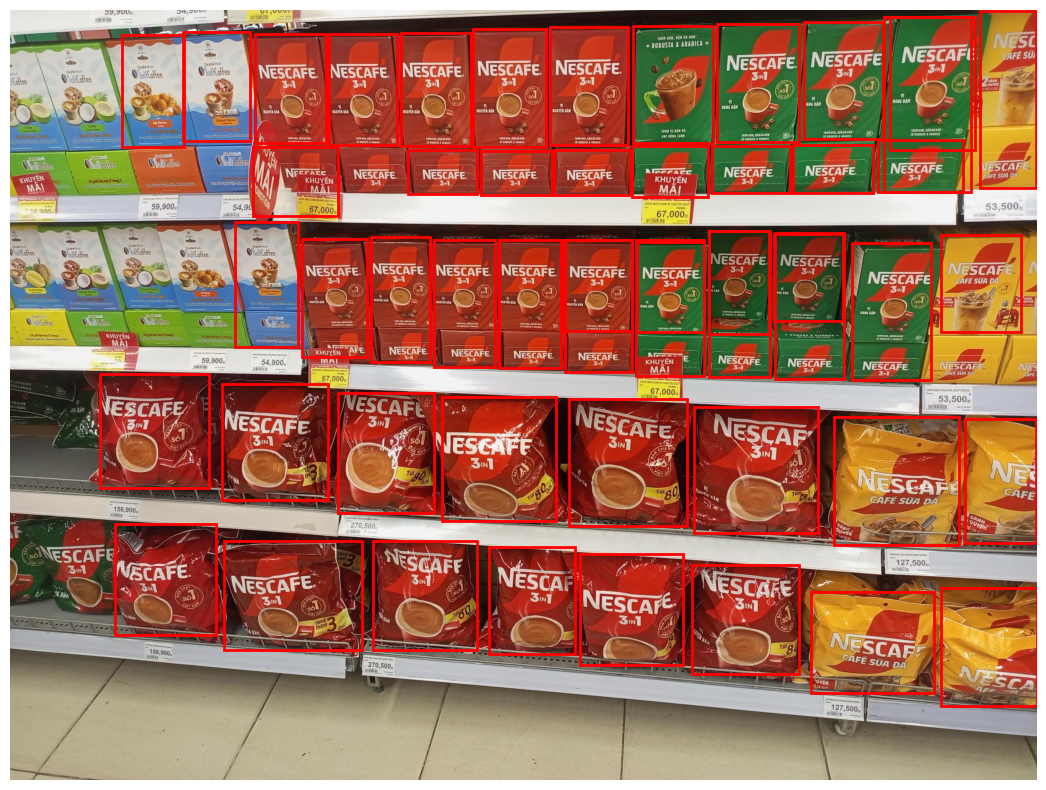

In [86]:
from hcmus.utils import viz_utils

image, _ = dataset[251]
image = ImageOps.exif_transpose(image)
result = pipeline.forward(image)
boxes = [x["box"] for x in result]
viz_utils.draw_boxes(image, boxes)

In [34]:
with open("predictions.json", "w") as f:
    json.dump(predictions, f)

In [79]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Step 1: Load ground truth annotations
coco_gt = COCO(ann_path)

# Step 3: Load results
coco_dt = coco_gt.loadRes("predictions.json")

# Step 4: Run evaluation
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.84s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.349
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.299
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets